In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.ensemble import IsolationForest
import seaborn as sns

sns.set()

Random forests are efficient way to deal with **high-dimensional** datasets.

The number of splittings (path length), from root to leaf, to isolate a data point, and averaged over a forest of such random trees, can be seen as a measure characterising our (regular) observations.

The path length is considerably _shorter_ for anomalies, or novelties, due to their highly specific feature values. Therefore, if a forest produces (on average) _shorter_ path lengths for particular data points, it's very likely these observations are anomalies.

# Data

In [21]:
# Train Data

# the higher the std_dev, the more difficult will be to differentiate regulars and outliers
# a std dev = 1, and this dataset will be impossible to distinguish
std_dev=0.4 

# drawing 100x2 data points from a normal N(0,1) * std_dev
X = std_dev * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2, X+[-2,2], X+[2,-2]]

In [36]:
# Test Data

# Regular New observations
X = std_dev * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2, X+[-2,2], X+[2,-2]]

# Outlier observations
X_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))

# Model

In [37]:
clf = IsolationForest(n_estimators=5, warm_start=True)
clf.fit(X_train)  # fit 10 trees to train data

IsolationForest(n_estimators=5, warm_start=True)

In [38]:
# We could add more trees if we need.
# Just uncomment the commands below.
# clf.set_params(n_estimators=20)  # add 10 more trees  
# clf.fit(X_train)  # fit the added trees  

In [39]:
# Classify features

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_outliers = clf.predict(X_outliers)

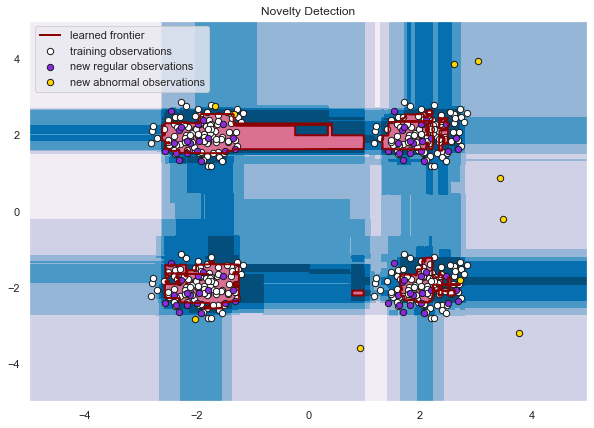

In [40]:
# plot the line, the points, and the nearest vectors to the plane

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# the classifier's learned frontiers
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
#plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.title("Novelty Detection")
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc = "upper left",
    prop = matplotlib.font_manager.FontProperties(size=11),
)

plt.show()

# Adding more Trees/Estimators

In a regular situation, this should have been done, before we had looked at the test set in the graph.

In [41]:
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(X_train)  # fit the added trees  

IsolationForest(n_estimators=20, warm_start=True)

In [42]:
# Classify features

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_outliers = clf.predict(X_outliers)

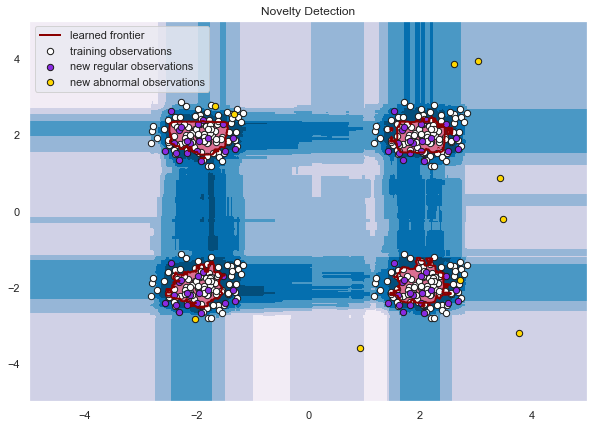

In [43]:
# plot the line, the points, and the nearest vectors to the plane

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# the classifier's learned frontiers
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
#plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.title("Novelty Detection")
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc = "upper left",
    prop = matplotlib.font_manager.FontProperties(size=11),
)

plt.show()